In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import numpy as np
import pylab as plt

In [3]:
## Gradient Descent Algorithm Check

In [87]:
def GD_regression(x,y,a0=0,b0=0, niter=1000, learning_rate=0.01):
    """
    Fit a straight line ax+b using Gradient Descent
    """
    N = len(y)
    costs = np.zeros(niter)
    for i in range(niter):
        if i == 0:
            a_now, b_now = a0, b0
        y_now = (a_now * x) + b_now
        costs[i] = sum([c**2 for c in (y-y_now)]) / N
        grad_a = -(2/N) * sum(x*(y-y_now))
        grad_b = -(2/N) * sum(y-y_now)      
        a_now = a_now - (learning_rate * grad_a)
        b_now = b_now - (learning_rate * grad_b)
        
    return a_now, b_now, costs

In [88]:
def SGD_regression(x,y,a0=0,b0=0, subset_size=20, niter=1000, learning_rate=0.01):
    """
    Fit a straight line ax+b with SGD (smaller subsets of data for each iteration)
    """
    N = len(y)
    costs = np.zeros(niter)
    for i in range(niter):
        if i == 0:
            a_now, b_now = a0, b0
        
        subset_index = np.random.random_integers(low=0, high=N-1, size=subset_size)
        x_subset = x[[subset_index]]
        y_subset = y[[subset_index]]
        
        y_now = (a_now * x_subset) + b_now
        costs[i] = sum([c**2 for c in (y_subset-y_now)]) / N
        grad_a = -(2/N) * sum(x_subset*(y_subset-y_now))
        grad_b = -(2/N) * sum(y_subset-y_now)      
        a_now = a_now - (learning_rate * grad_a)
        b_now = b_now - (learning_rate * grad_b)
        
    return a_now, b_now, costs

In [64]:
samp_x = np.sort(np.random.rand(50))
samp_N = np.random.rand(50) * np.random.rand(50)
samp_y = samp_x * 2 + samp_N

In [89]:
slope, intersect, costs = GD_regression(samp_x, samp_y)

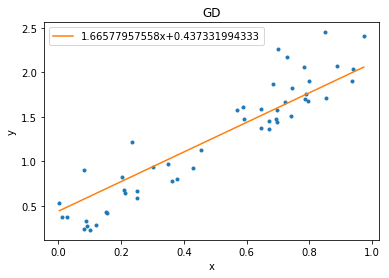

In [90]:
plt.plot(samp_x, samp_y, '.')
plt.plot(samp_x, slope*samp_x+intersect, label=str(slope)+'x+'+str(intersect))
plt.xlabel('x')
plt.ylabel('y')
plt.title('GD')
plt.legend()

In [92]:
slope, intersect, costs = SGD_regression(samp_x, samp_y)

/Users/Doyeon/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: This function is deprecated. Please call randint(0, 49 + 1) instead
  # This is added back by InteractiveShellApp.init_path()


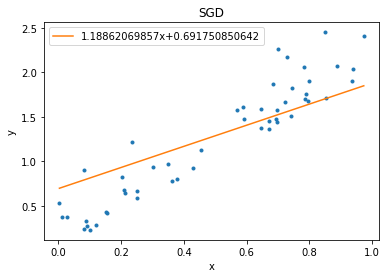

In [93]:
plt.plot(samp_x, samp_y, '.')
plt.plot(samp_x, slope*samp_x+intersect, label=str(slope)+'x+'+str(intersect))

plt.xlabel('x')
plt.ylabel('y')
plt.title('SGD')
plt.legend()

In [91]:
def SGD_momentum_regression(x,y,a0=0,b0=0, subset_size=20, niter=1000, learning_rate=0.001, vrate=0.85):
    """
    Fit a straight line ax+b with SGD Moment(smaller subsets of data for each iteration)
    vrate: velocity weight
    """
    N = len(y)
    costs = np.zeros(niter)
    vel_a = np.zeros(niter)
    vel_b = np.zeros(niter)
    
    for i in range(niter):
        if i == 0:
            a_now, b_now = a0, b0
        
        subset_index = np.random.random_integers(low=0, high=N-1, size=subset_size)
        x_subset = x[[subset_index]]
        y_subset = y[[subset_index]]
        
        y_now = (a_now * x_subset) + b_now
        costs[i] = sum([c**2 for c in (y_subset-y_now)]) / N
        grad_a = -(2/N) * sum(x_subset*(y_subset-y_now))
        grad_b = -(2/N) * sum(y_subset-y_now)
        a_past = a_now ## just to perserve
        b_past = b_now
        
        a_now = a_now - (learning_rate * grad_a + vrate * vel_a[i])
        b_now = b_now - (learning_rate * grad_b + vrate * vel_b[i])
        
        vel_a[i] = a_now - a_past
        vel_b[i] = b_now - b_past
    
    velocities = np.vstack((vel_a, vel_b))
        
    return a_now, b_now, costs, velocities

In [94]:
slope, intersect, costs, velocities = SGD_momentum_regression(samp_x, samp_y)

/Users/Doyeon/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: DeprecationWarning: This function is deprecated. Please call randint(0, 49 + 1) instead
  from ipykernel import kernelapp as app


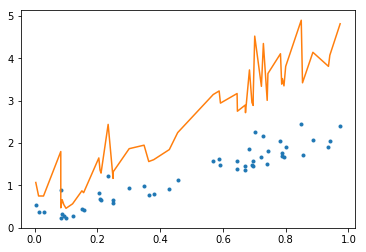

In [69]:
plt.plot(samp_x, samp_y, '.')
plt.plot(samp_x, 2*samp_y, '-')

Text(0.5,1,'SGD Momentum')

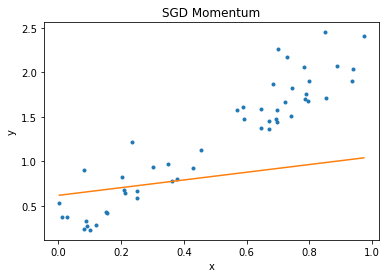

In [95]:
plt.plot(samp_x, samp_y, '.')
#plt.plot(samp_x,slope*samp_x+intersect)
plt.plot(samp_x, slope*samp_x+intersect, label=str(slope)+'x+'+str(intersect))
plt.xlabel('x')
plt.ylabel('y')
plt.title('SGD Momentum')

In [101]:
def AdaGrad(x,y,a0=0,b0=0, subset_size=20, niter=10000, learning_rate=0.01):
    """
    Fit a straight line ax+b with SGD Moment(smaller subsets of data for each iteration)
    vrate: velocity weight
    """
    N = len(y)
    costs = np.zeros(niter)
    
    for i in range(niter):
        if i == 0:
            a_now, b_now = a0, b0
        
        subset_index = np.random.random_integers(low=0, high=N-1, size=subset_size)
        x_subset = x[[subset_index]]
        y_subset = y[[subset_index]]
        
        y_now = (a_now * x_subset) + b_now
        costs[i] = sum([c**2 for c in (y_subset-y_now)]) / N
        grad_a = -(2/N) * sum(x_subset*(y_subset-y_now))
        grad_b = -(2/N) * sum(y_subset-y_now)

        eps = 0.1 * np.std(x) ## small noise term to fiddle around
        a_now = a_now - (learning_rate * grad_a) / (np.sqrt(grad_a**2)+eps)
        b_now = b_now - (learning_rate * grad_b) / (np.sqrt(grad_b**2)+eps)

        
    return a_now, b_now, costs

In [98]:
slope, intersect, costs = AdaGrad(samp_x, samp_y)

/Users/Doyeon/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: DeprecationWarning: This function is deprecated. Please call randint(0, 49 + 1) instead
  del sys.path[0]


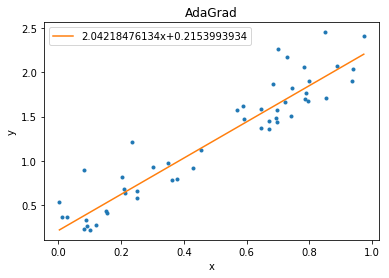

In [100]:
plt.plot(samp_x, samp_y, '.')
#plt.plot(samp_x,slope*samp_x+intersect)
plt.plot(samp_x, slope*samp_x+intersect, label=str(slope)+'x+'+str(intersect))
plt.xlabel('x')
plt.ylabel('y')
plt.title('AdaGrad')
plt.legend()

In [102]:
def RMSprop(x,y,a0=0,b0=0, subset_size=20, niter=10000, learning_rate=0.01, gamma=0.85):
    """
    Fit a straight line ax+b with SGD Moment(smaller subsets of data for each iteration)
    gamma: weights of how much previous gradient is considered
    """
    N = len(y)
    costs = np.zeros(niter)
    a_decay = np.zeros(niter+1)
    b_decay = np.zeros(niter+1)
    
    for i in range(niter):
        if i == 0:
            a_now, b_now = a0, b0
            
        
        subset_index = np.random.random_integers(low=0, high=N-1, size=subset_size)
        x_subset = x[[subset_index]]
        y_subset = y[[subset_index]]
        
        y_now = (a_now * x_subset) + b_now
        costs[i] = sum([c**2 for c in (y_subset-y_now)]) / N
        grad_a = -(2/N) * sum(x_subset*(y_subset-y_now))
        grad_b = -(2/N) * sum(y_subset-y_now)

        eps = 0.1 * np.std(x) ## small noise term to fiddle around
        
        if i == 0:
            a_decay[i], b_decay[i] = grad_a**2, grad_b**2
          
        a_decay[i+1] =  gamma * a_decay[i] + (1-gamma) * (grad_a**2)
        b_decay[i+1] = gamma * b_decay[i] + (1-gamma) * (grad_b**2) 
        
        a_now = a_now - (learning_rate * grad_a) / (np.sqrt(a_decay[i+1])+eps)
        b_now = b_now - (learning_rate * grad_b) / (np.sqrt(b_decay[i+1])+eps)

        
    return a_now, b_now, costs

In [103]:
slope, intersect, costs = RMSprop(samp_x, samp_y)

/Users/Doyeon/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: DeprecationWarning: This function is deprecated. Please call randint(0, 49 + 1) instead
  app.launch_new_instance()


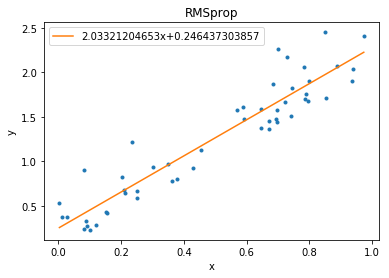

In [104]:
plt.plot(samp_x, samp_y, '.')
plt.plot(samp_x, slope*samp_x+intersect, label=str(slope)+'x+'+str(intersect))
plt.xlabel('x')
plt.ylabel('y')
plt.title('RMSprop')
plt.legend()

In [105]:
def AdaDelta(x,y,a0=0,b0=0, subset_size=20, niter=10000, learning_rate=0.01, gamma=0.85):
    """
    Fit a straight line ax+b with SGD Moment(smaller subsets of data for each iteration)
    gamma: weights of how much previous gradient is considered
    """
    N = len(y)
    costs = np.zeros(niter)
    a_decay = np.zeros(niter+1)
    b_decay = np.zeros(niter+1)
    
    for i in range(niter):
        if i == 0:
            a_now, b_now = a0, b0
            
        
        subset_index = np.random.random_integers(low=0, high=N-1, size=subset_size)
        x_subset = x[[subset_index]]
        y_subset = y[[subset_index]]
        
        y_now = (a_now * x_subset) + b_now
        costs[i] = sum([c**2 for c in (y_subset-y_now)]) / N
        grad_a = -(2/N) * sum(x_subset*(y_subset-y_now))
        grad_b = -(2/N) * sum(y_subset-y_now)

        eps = 0.1 * np.std(x) ## small noise term to fiddle around
        
        if i == 0:
            a_decay[i], b_decay[i] = grad_a**2, grad_b**2
        
        a_now = a_now - (learning_rate * grad_a) / (np.sqrt(a_decay[i]**2)+eps)
        b_now = b_now - (learning_rate * grad_b) / (np.sqrt(b_decay[i]**2)+eps)

        a_decay[i+1] =  gamma * a_decay[i] + (1-gamma) * (grad_a**2)
        b_decay[i+1] = gamma * b_decay[i] + (1-gamma) * (grad_b**2) 
        
    return a_now, b_now, costs

In [106]:
slope, intersect, costs = AdaDelta(samp_x, samp_y)

/Users/Doyeon/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: DeprecationWarning: This function is deprecated. Please call randint(0, 49 + 1) instead
  app.launch_new_instance()


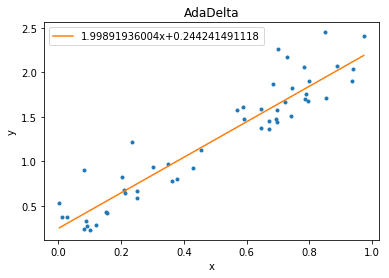

In [107]:
plt.plot(samp_x, samp_y, '.')
plt.plot(samp_x, slope*samp_x+intersect, label=str(slope)+'x+'+str(intersect))
plt.xlabel('x')
plt.ylabel('y')
plt.title('AdaDelta')
plt.legend()